In [2]:
import json

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from astropy import wcs
from astropy.io import fits
from PIL import Image
from astropy import units as u


from astropy.coordinates import SkyCoord

import utils

In [3]:
df = pd.read_csv('/Users/user/repos/zoobot-3d/data/gz3d_and_gz_desi_master_catalog.csv')
galaxy = df.iloc[32]
galaxy

ra_subject                                                          165.29715
dec_subject                                                         12.474752
mangaid                                                              1-304336
iauname                                                   J110111.31+122829.1
ifudesignsize                                                           127.0
manga_tileid                                                           6800.0
nsa_id                                                                 321982
explorer_link               http://skyserver.sdss.org/dr13/en/tools/chart/...
gz_total_classifications                                                   34
gz_bar_votes                                                               14
gz_spiral_votes                                                            13
sample                                                               original
best_match                                                      

In [4]:

raw_responses = fits.open(galaxy['local_gz3d_fits_loc'])[9].data
raw_responses

FITS_rec([( 88488726, '2018-02-03 04:05:36 UTC', '[[[281.3, 264.5]]]'),
          (111371171, '2018-05-25 17:40:55 UTC', '[[[241, 270.6], [240, 269.6], [237, 265.6], [230, 257.6], [229, 255.6], [228, 253.6], [226, 251.6], [225, 250.6], [224, 247.6], [223, 245.6], [222, 242.6], [219, 235.6], [218, 217.6], [219, 209.6], [225, 194.6], [227, 189.6], [228, 187.6], [229, 185.6], [230, 184.6], [231, 181.6], [232, 179.6], [233, 177.6], [234, 175.6], [235, 175.6], [239, 174.6], [247, 173.6], [252, 172.6], [255, 172.6], [261, 172.6], [269, 172.6], [278, 173.6], [284, 173.6], [291, 173.6], [299, 172.6], [308, 172.6], [311, 172.6], [316, 174.6], [320, 176.6], [324, 178.6], [325, 179.6], [328, 181.6], [331, 184.6], [338, 190.6], [341, 193.6], [344, 198.6], [344, 199.6], [344, 200.6], [346, 203.6], [347, 204.6], [347, 205.6], [347, 206.6], [347, 207.6], [346, 207.6], [345, 207.6], [344, 207.6], [342, 206.6], [341, 206.6], [339, 205.6], [337, 205.6], [335, 203.6], [333, 203.6], [331, 202.6], [329, 20

In [5]:
spiral_marks_by_user = [json.loads(r[2]) for r in raw_responses]


In [6]:
spiral_marks_by_user[0]

[[[281.3, 264.5]]]

In [7]:
spiral_marks_by_user[10]

[[[262, 237.8],
  [262, 234.8],
  [262, 232.8],
  [262, 228.8],
  [262, 225.8],
  [262, 222.8],
  [263, 218.8],
  [265, 216.8],
  [268, 213.8],
  [272, 210.8],
  [274, 208.8],
  [278, 206.8],
  [280, 204.8],
  [282, 203.8],
  [285, 201.8],
  [287, 201.8],
  [289, 200.8],
  [293, 200.8],
  [295, 200.8],
  [298, 200.8],
  [303, 200.8],
  [306, 202.8],
  [308, 203.8],
  [311, 205.8],
  [315, 209.8],
  [317, 210.8],
  [321, 213.8],
  [326, 217.8],
  [328, 218.8],
  [331, 221.8],
  [332, 222.8],
  [333, 224.8],
  [334, 226.8],
  [335, 227.8],
  [337, 230.8],
  [339, 234.8],
  [342, 238.8],
  [345, 243.8],
  [347, 248.8],
  [350, 253.8],
  [353, 257.8],
  [355, 261.8],
  [355, 263.8],
  [356, 266.8],
  [358, 269.8],
  [358, 271.8],
  [359, 275.8],
  [360, 278.8],
  [361, 282.8],
  [362, 285.8],
  [363, 291.8],
  [363, 296.8],
  [363, 301.8],
  [363, 305.8],
  [363, 310.8],
  [363, 314.8],
  [363, 318.8],
  [363, 322.8],
  [363, 325.8],
  [362, 333.8],
  [361, 341.8],
  [359, 347.8],
  [357, 

In [8]:
spiral_marks_by_user[10][0]

[[262, 237.8],
 [262, 234.8],
 [262, 232.8],
 [262, 228.8],
 [262, 225.8],
 [262, 222.8],
 [263, 218.8],
 [265, 216.8],
 [268, 213.8],
 [272, 210.8],
 [274, 208.8],
 [278, 206.8],
 [280, 204.8],
 [282, 203.8],
 [285, 201.8],
 [287, 201.8],
 [289, 200.8],
 [293, 200.8],
 [295, 200.8],
 [298, 200.8],
 [303, 200.8],
 [306, 202.8],
 [308, 203.8],
 [311, 205.8],
 [315, 209.8],
 [317, 210.8],
 [321, 213.8],
 [326, 217.8],
 [328, 218.8],
 [331, 221.8],
 [332, 222.8],
 [333, 224.8],
 [334, 226.8],
 [335, 227.8],
 [337, 230.8],
 [339, 234.8],
 [342, 238.8],
 [345, 243.8],
 [347, 248.8],
 [350, 253.8],
 [353, 257.8],
 [355, 261.8],
 [355, 263.8],
 [356, 266.8],
 [358, 269.8],
 [358, 271.8],
 [359, 275.8],
 [360, 278.8],
 [361, 282.8],
 [362, 285.8],
 [363, 291.8],
 [363, 296.8],
 [363, 301.8],
 [363, 305.8],
 [363, 310.8],
 [363, 314.8],
 [363, 318.8],
 [363, 322.8],
 [363, 325.8],
 [362, 333.8],
 [361, 341.8],
 [359, 347.8],
 [357, 352.8],
 [355, 359.8],
 [354, 362.8],
 [352, 366.8],
 [351, 368

In [9]:
spiral_marks_by_user[10][1]

[[239, 287.8],
 [238, 287.8],
 [236, 287.8],
 [234, 287.8],
 [232, 287.8],
 [230, 286.8],
 [228, 284.8],
 [225, 280.8],
 [222, 275.8],
 [218, 270.8],
 [215, 264.8],
 [212, 259.8],
 [208, 252.8],
 [205, 246.8],
 [203, 241.8],
 [201, 237.8],
 [199, 232.8],
 [197, 228.8],
 [196, 225.8],
 [195, 217.8],
 [195, 211.8],
 [195, 203.8],
 [195, 197.8],
 [197, 194.8],
 [199, 189.8],
 [203, 184.8],
 [205, 181.8],
 [208, 177.8],
 [212, 174.8],
 [214, 172.8],
 [217, 169.8],
 [221, 166.8],
 [225, 164.8],
 [230, 162.8],
 [234, 160.8],
 [243, 158.8],
 [247, 157.8],
 [252, 156.8],
 [256, 155.8],
 [258, 155.8],
 [261, 155.8],
 [265, 155.8],
 [268, 154.8],
 [270, 154.8],
 [273, 154.8],
 [274, 154.8],
 [276, 154.8],
 [278, 154.8],
 [279, 154.8],
 [280, 154.8],
 [279, 154.8],
 [277, 153.8],
 [273, 151.8],
 [265, 149.8],
 [252, 147.8],
 [239, 147.8],
 [231, 147.8],
 [220, 147.8],
 [210, 148.8],
 [203, 149.8],
 [192, 151.8],
 [183, 154.8],
 [175, 157.8],
 [167, 160.8],
 [163, 163.8],
 [162, 164.8],
 [160, 167

In [10]:
len(spiral_marks_by_user[10])

4

In [11]:
x = np.array(spiral_marks_by_user[10][0])
x.shape

(151, 2)

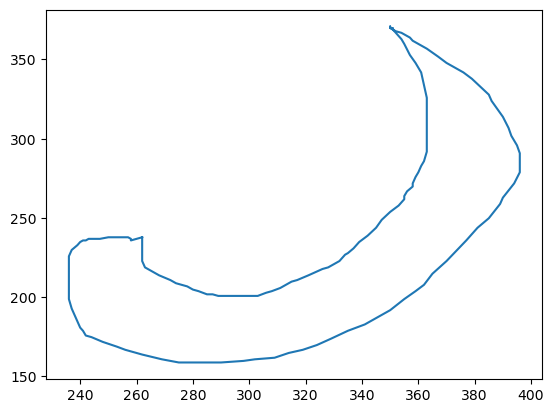

In [12]:
plt.plot(x[:, 0], x[:, 1])

In [32]:
from matplotlib.path import Path
from shapely.geometry import LineString

# https://github.com/CKrawczyk/GZ3D_production/blob/master/make_subject_fits.py#L140C17-L140C17
def path(X, dimensions, coords, remove_self_intersecting=False):
    # X is list of lists
    mask = np.zeros(dimensions)
    # remove self intersecting paths
    for p in X:
        codes = [Path.MOVETO] + [Path.LINETO] * len(p)

        if len(p) > 1:
            if remove_self_intersecting:
                # removal here
                if not LineString(p).is_simple:  # "any self-intersections are only at boundary points"
                    continue  # skip this loop iteration and keep going (unlike break)
        p_closed = p + [p[0]]
        mpl_path = Path(p_closed, codes=codes)
        # this highlights the 'inside'
        # assumes path is closed - in practice, connects last vertex back to first vertex
        inside = mpl_path.contains_points(coords).reshape(*dimensions)
        mask += inside
    return mask

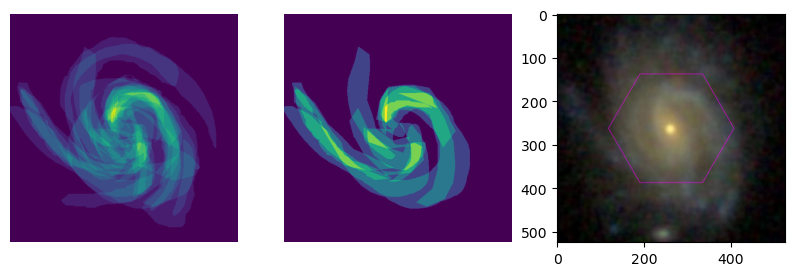

In [47]:
dimensions=(525, 525)
coords = [[x, y] for y in range(dimensions[1]) for x in range(dimensions[0])]

mask = np.zeros(dimensions)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(10, 5))
for user_marks in spiral_marks_by_user:
    mask += path(user_marks, dimensions=dimensions, coords=coords, remove_self_intersecting=False)

ax0.imshow(mask)
ax0.axis('off')

mask = np.zeros(dimensions)
for user_marks in spiral_marks_by_user:
    mask += path(user_marks, dimensions=dimensions, coords=coords, remove_self_intersecting=True)

ax1.imshow(mask)
ax1.axis('off')

ax2.imshow(fits.open(galaxy['local_gz3d_fits_loc'])[0].data)

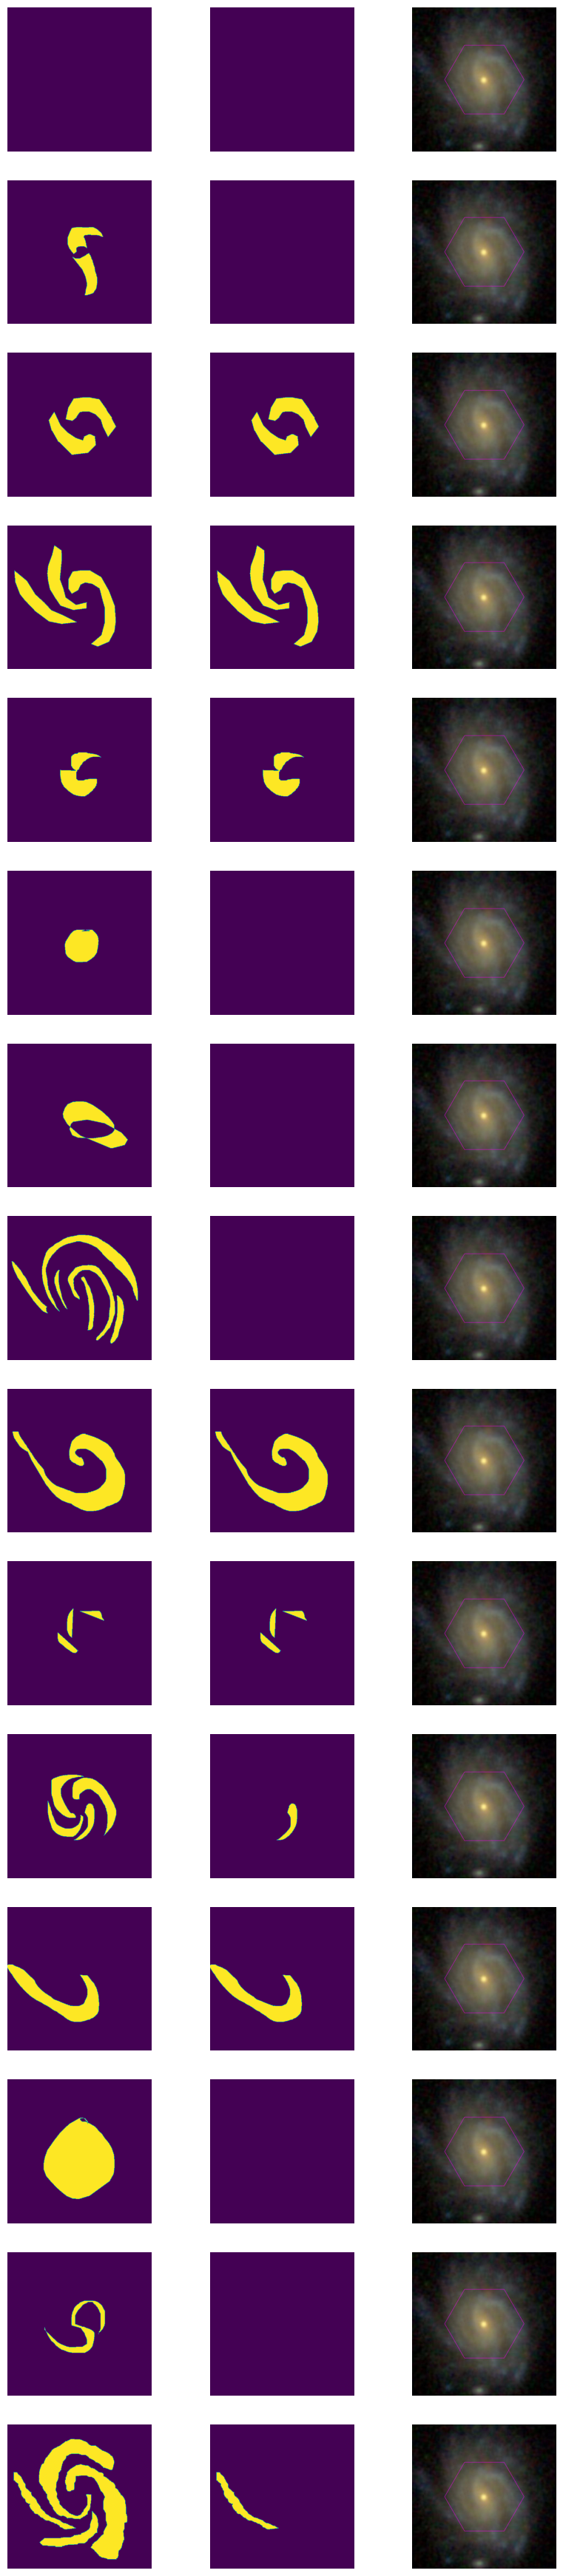

In [57]:
dimensions=(525, 525)
coords = [[x, y] for y in range(dimensions[1]) for x in range(dimensions[0])]


# spiral_marks_to_plot = spiral_marks_by_user[6:7]

fig, rows = plt.subplots(ncols=3, nrows=len(spiral_marks_by_user), figsize=(10, len(spiral_marks_by_user)*3))

for user_index in range(len(spiral_marks_by_user)):

    row = rows[user_index]
    marks_by_this_user = spiral_marks_by_user[user_index]

    full_mask = np.zeros(dimensions)
    for user_segment in marks_by_this_user:
        full_mask += path([user_segment], dimensions=dimensions, coords=coords, remove_self_intersecting=False)


    trimmed_mask = np.zeros(dimensions)
    for user_segment in marks_by_this_user:
        trimmed_mask += path([user_segment], dimensions=dimensions, coords=coords, remove_self_intersecting=True)

    ax0, ax1, ax2 = row

    ax0.imshow(full_mask)
    ax0.axis('off')

    ax1.imshow(trimmed_mask)
    ax1.axis('off')

    ax2.imshow(fits.open(galaxy['local_gz3d_fits_loc'])[0].data)
    ax2.axis('off')

In [60]:
with open('temp.json', 'w') as f:
    json.dump(spiral_marks_by_user, f)